In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('Social_Network_Ads.csv')

In [26]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [28]:
gender_binary=pd.get_dummies(df['Gender'],drop_first=True)

In [29]:
df=pd.concat([df,gender_binary],axis=1)

In [30]:
df.drop('Gender',axis=1,inplace=True)

In [31]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [32]:
df.drop(['User ID','Male'],axis=1,inplace=True)

In [33]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [34]:
import seaborn as sns

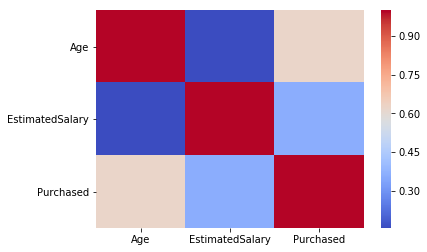

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [36]:
X=df.drop('Purchased',axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss=StandardScaler()

In [39]:
scaled_array=ss.fit_transform(X)

In [40]:
scaled_array.shape

(400, 2)

In [41]:
X=pd.DataFrame(data=scaled_array,columns=X.columns)

In [42]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [43]:
Y=df['Purchased']

In [44]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [45]:
#SVM GOOD FOR SMALL DATA

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [48]:
from sklearn.svm import SVC

In [49]:
classifier=SVC()

In [50]:
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
ypred=classifier.predict(X_test)

In [52]:
ypred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [53]:
ypred.shape

(120,)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(Y_test,ypred)

array([[68,  9],
       [ 3, 40]], dtype=int64)